In [72]:
import pandas as pd
import random
# import dill
import numpy as np
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches, Pt
from IPython.display import display, Markdown
import matplotlib.dates as mdates
from pyxlsb import open_workbook
import re
import os
 



In [73]:
def dxr_clv_bussiness(file_path, sheet_no, month):
    data_rows = []
    with open_workbook(file_path) as wb:
        with wb.get_sheet(sheet_no) as sheet:
            for row in sheet.rows():
                row = row[1:14]
                
                for item in row:
                    if item.v == "DXR":
                        data_rows.append([item.v for item in row])
                        break
    if data_rows:
        df = pd.DataFrame(data_rows)
        df.columns = list(range(1, df.shape[1] + 1))
        df.index = [month] * len(df)
        return df
    else:
        return pd.DataFrame()

In [74]:
sep_2024_sales = dxr_clv_bussiness('C:\\Users\\320267200\\OneDrive - Philips\\Desktop\\CLV automation\\Data\\CLV-IB Report - All Markets - Sep 2024 - Final.xlsb','CLV-IB Sales Tables','Sep Sales')

In [75]:
sep_2024_sales

,1,2,3,4,5,6,7,8,9,10,11,12,13
Sep Sales,DXR,BA8,Maximizer DXR,0.120337,0.078219,3.204782,2.367138,0.0,0.0,2.131135,1.293140,0.533449,0.278128
Sep Sales,DXR,BA9,Tech Educat DXR,0.052032,0.033821,0.013723,0.009606,0.0,0.0,-0.000446,0.011071,0.019649,0.020683
Sep Sales,DXR,Q71,DXR Opt and upgr SV,4.812546,3.128155,2.167506,1.047582,0.0,0.0,1.078848,1.873981,3.431596,3.576718
Sep Sales,DXR,V24,Clin Educat DXR,1.776225,1.154546,1.595346,1.144790,0.0,0.0,1.294104,1.379919,1.645302,1.747059
Sep Sales,DXR,X19,DXR Upgrades,3.631639,2.360565,4.936179,4.276943,0.0,0.0,1.409521,2.519321,2.408880,2.291978
Sep Sales,DXR,CF4,DXR Prof Services,0.066885,0.043475,0.005459,0.004718,0.0,0.0,0.000153,0.017273,0.013042,0.013129


In [76]:
sep_2024_igm = dxr_clv_bussiness('C:\\Users\\320267200\\OneDrive - Philips\\Desktop\\CLV automation\\Data\\CLV-IB Report - All Markets - Sep 2024 - Final.xlsb','CLV-IB IGM Tables','Sep IGM')

In [77]:
sep_2024_igm

,1,2,3,4,5,6,7,8,9,10,11,12,13
Sep IGM,DXR,BA8,Maximizer DXR,0.109466,0.071153,2.972420,2.198300,0.0,-5.446946,-20.552252,0.141207,0.365485,0.294332
Sep IGM,DXR,BA9,Tech Educat DXR,0.037401,0.024311,0.000000,0.000000,0.0,-0.118474,-0.067652,-0.006962,-0.005338,-0.029648
Sep IGM,DXR,Q71,DXR Opt and upgr SV,1.450058,0.942538,-0.124725,-0.508837,0.0,-0.572801,-0.061841,0.608416,0.783715,-0.158823
Sep IGM,DXR,V24,Clin Educat DXR,0.847424,0.550826,-1.618213,-1.348963,0.0,-0.681931,-0.671738,0.407698,0.635667,0.084841
Sep IGM,DXR,X19,DXR Upgrades,0.798029,0.518719,2.077835,1.779213,0.0,0.001460,0.275657,0.467670,0.337610,-0.181109
Sep IGM,DXR,CF4,DXR Prof Services,0.028449,0.018492,0.003016,0.003016,0.0,-0.109511,-0.045825,0.007531,0.008266,-0.010226


In [78]:
data = []

column_names = [ "MAG Description", "Achieved in Euros", "iGM (M €)", "iGM k euros %"]
index_names = ['BA8', 'BA9', 'Q71', 'V24', 'X19','CF4']
sep_revenue= pd.DataFrame(data, index=index_names,columns=column_names)


In [79]:
sep_revenue.loc['BA8', 'MAG Description'] = sep_2024_sales.iloc[0,2]
sep_revenue.loc['BA9', 'MAG Description'] = sep_2024_sales.iloc[1,2]
sep_revenue.loc['Q71', 'MAG Description'] = sep_2024_sales.iloc[2,2]
sep_revenue.loc['V24', 'MAG Description'] = sep_2024_sales.iloc[3,2]
sep_revenue.loc['X19', 'MAG Description'] = sep_2024_sales.iloc[4,2]
sep_revenue.loc['CF4', 'MAG Description'] = sep_2024_sales.iloc[5,2]


sep_revenue.loc['BA8', 'Achieved in Euros'] = (((sep_2024_sales.iloc[0,12]) * 1000).round()).astype(int)
sep_revenue.loc['BA9', 'Achieved in Euros'] = (((sep_2024_sales.iloc[1,12]) * 1000).round()).astype(int)
sep_revenue.loc['Q71', 'Achieved in Euros'] = (((sep_2024_sales.iloc[2,12]) * 1000).round()).astype(int)
sep_revenue.loc['V24', 'Achieved in Euros'] = (((sep_2024_sales.iloc[3,12]) * 1000).round()).astype(int)
sep_revenue.loc['X19', 'Achieved in Euros'] = (((sep_2024_sales.iloc[4,12]) * 1000).round()).astype(int)
sep_revenue.loc['CF4', 'Achieved in Euros'] = (((sep_2024_sales.iloc[5,12]) * 1000).round()).astype(int)


sep_revenue.loc['BA8', 'iGM (M €)'] = (((sep_2024_igm.iloc[0,11]) * 1000).round()).astype(int)
sep_revenue.loc['BA9', 'iGM (M €)'] = (((sep_2024_igm.iloc[1,11]) * 1000).round()).astype(int)
sep_revenue.loc['Q71', 'iGM (M €)'] = (((sep_2024_igm.iloc[2,11]) * 1000).round()).astype(int)
sep_revenue.loc['V24', 'iGM (M €)'] = (((sep_2024_igm.iloc[3,11]) * 1000).round()).astype(int)
sep_revenue.loc['X19', 'iGM (M €)'] = (((sep_2024_igm.iloc[4,11]) * 1000).round()).astype(int)
sep_revenue.loc['CF4', 'iGM (M €)'] = (((sep_2024_igm.iloc[5,11]) * 1000).round()).astype(int)

igm_k_euros_per_sep = (sep_revenue['iGM (M €)'] / sep_revenue['Achieved in Euros']) * 100
sep_revenue['iGM k euros %'] = (igm_k_euros_per_sep.round()).astype(int)


In [80]:
# Calculate the total for 'Achieved in Euros' and 'iGM (M €)'
total_achieved_euros = sep_revenue['Achieved in Euros'].sum()
total_achieved_euros_millions = total_achieved_euros / 1000

total_igm = sep_revenue['iGM (M €)'].sum()

# Calculate the weighted average for 'iGM k euros %'
sep_weighted_igm_k_euros_per = (total_igm / total_achieved_euros) * 100
sep_weighted_igm_k_euros_per = round(sep_weighted_igm_k_euros_per, 1)

# Add the last row with totals and correct iGM k euros %
sep_revenue.loc['Total'] = ['Total', total_achieved_euros, total_igm, sep_weighted_igm_k_euros_per]

# Display the updated DataFrame
sep_revenue



,MAG Description,Achieved in Euros,iGM (M €),iGM k euros %
BA8,Maximizer DXR,278,365,131.0
BA9,Tech Educat DXR,21,-5,-23.0
Q71,DXR Opt and upgr SV,3577,784,21.0
V24,Clin Educat DXR,1747,636,36.0
X19,DXR Upgrades,2292,338,14.0
CF4,DXR Prof Services,13,8,61.0
Total,Total,7928,2126,26.8


In [81]:

# Function to generate a dynamic pie chart for revenue and iGM %
def generate_revenue_pie_chart(revenue_df, month, year, total_revenue_millions, weighted_igm_k_euros_per, output_folder='charts'):
    # Filter out unwanted rows: 'Total', 'Tech Educat DXR', and 'DXR Prof Services'
    filtered_revenue = revenue_df[~revenue_df['MAG Description'].isin(['Total', 'Tech Educat DXR', 'DXR Prof Services'])]

    # Labels for the pie chart, showing MAG Description and Achieved in Euros
    labels = [f"{desc}\n{achieved}€" for desc, achieved in zip(filtered_revenue['MAG Description'], filtered_revenue['Achieved in Euros'])]

    # Create the pie chart
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        filtered_revenue['Achieved in Euros'], 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90, 
        textprops={'size': 'small'}, 
        colors=plt.cm.Set3(np.linspace(0, 1, len(filtered_revenue['MAG Description'])))
    )

    # Title dynamically using month, year, and total revenue (in M€) and weighted iGM %
    plt.title(f'{month} {year} YTD Revenue {total_revenue_millions:.1f} M€ & iGM {weighted_igm_k_euros_per} %')

    # Add a legend showing iGM k euros %
    legend_labels = [f"{desc}: {igm}%" for desc, igm in zip(filtered_revenue['MAG Description'], filtered_revenue['iGM k euros %'])]
    plt.legend(wedges, legend_labels, title="iGM k euros %", loc="center left", bbox_to_anchor=(1, 0.5))

    # Save the chart dynamically based on the month and year
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    chart_file_name = os.path.join(output_folder, f'{month}_{year}_YTD_Revenue.png')
    plt.tight_layout()
    plt.savefig(chart_file_name, bbox_inches='tight')
    plt.show()

    print(f"Pie chart saved as {chart_file_name}")

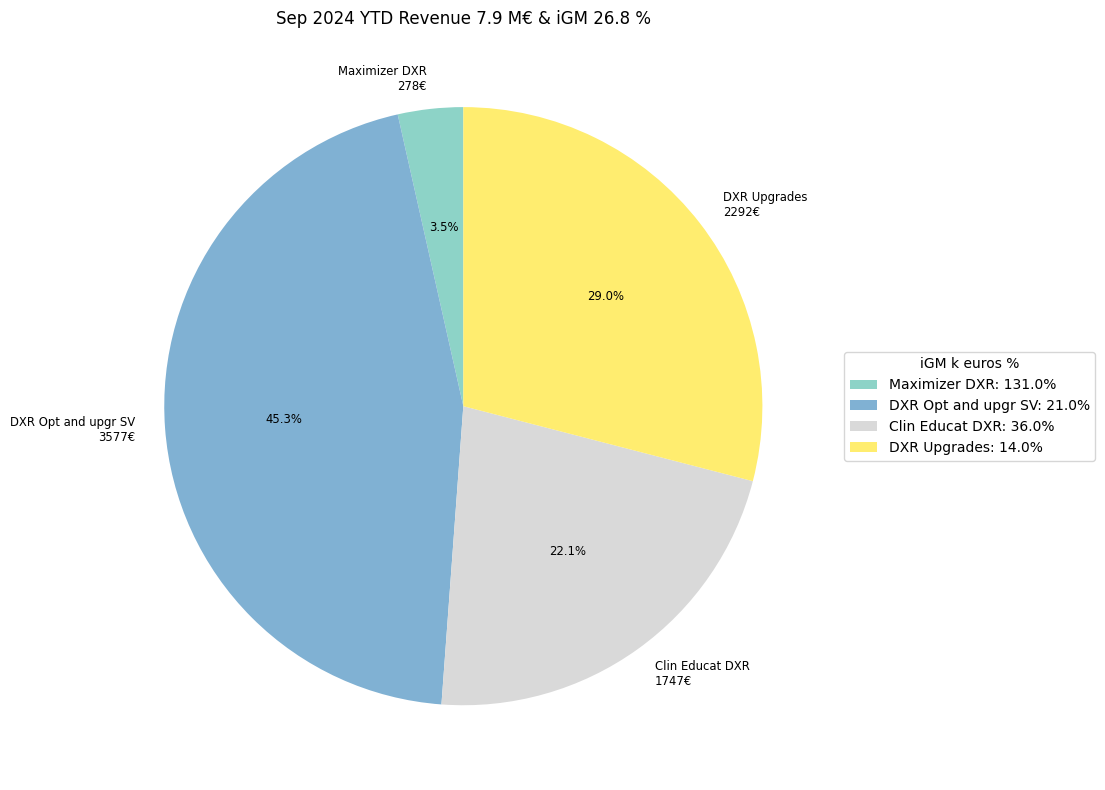

Pie chart saved as charts\Sep_2024_YTD_Revenue.png


In [82]:
# Assuming july_revenue is the DataFrame for July and you have calculated total_revenue and total_igm:
# generate_revenue_pie_chart(july_revenue, 'Jul', 2024, total_revenue=6.5, total_igm=20)

generate_revenue_pie_chart(sep_revenue, 'Sep', 2024, weighted_igm_k_euros_per=sep_weighted_igm_k_euros_per, total_revenue_millions=total_achieved_euros_millions)


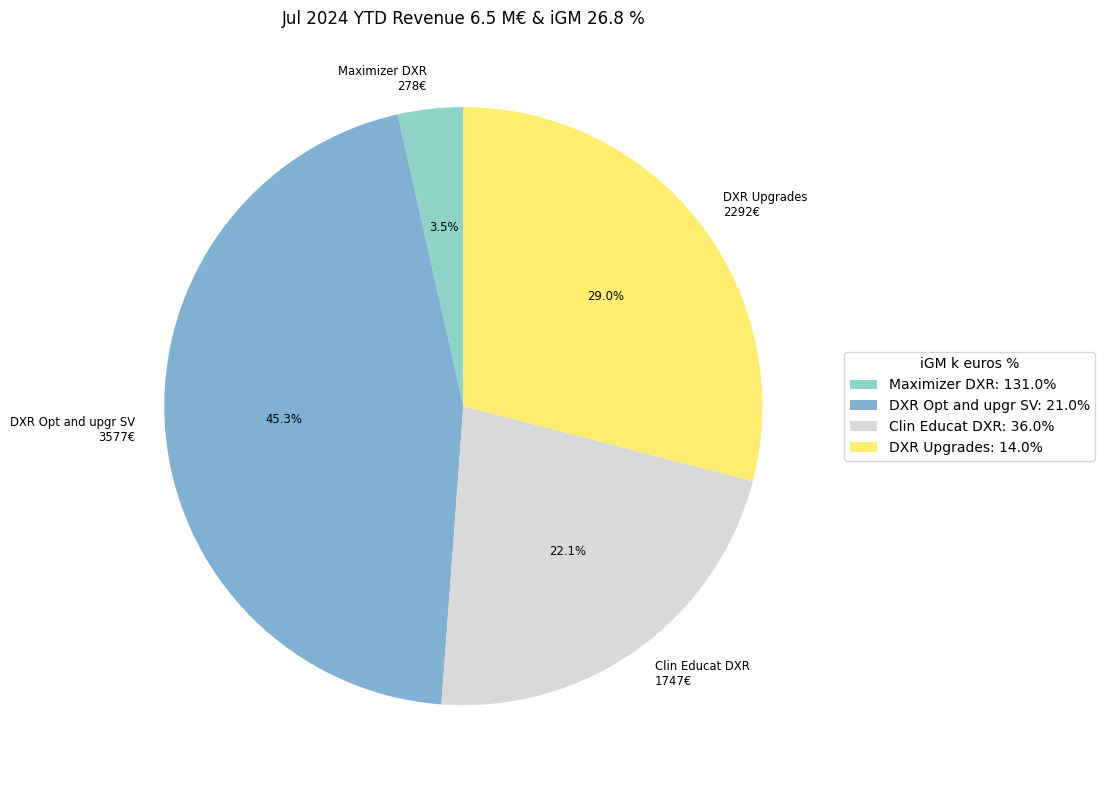

In [83]:
# Filter the rows to exclude "Tech Educat DXR", "DXR Prof Services", and the 'Total' row
filtered_revenue = sep_revenue.loc[sep_revenue.index != 'Total']  # Exclude the total row
filtered_revenue = filtered_revenue[~filtered_revenue['MAG Description'].isin(['Tech Educat DXR', 'DXR Prof Services'])]

# Labels for the pie chart, showing MAG Description and Achieved in Euros
labels = [f"{desc}\n{achieved}€" for desc, achieved in zip(filtered_revenue['MAG Description'], filtered_revenue['Achieved in Euros'])]

# Create the pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(filtered_revenue['Achieved in Euros'], 
                                   labels=labels, 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   textprops={'size': 'small'}, 
                                   colors=plt.cm.Set3(np.linspace(0, 1, len(filtered_revenue['MAG Description']))))

plt.title(f'Jul 2024 YTD Revenue 6.5 M€ & iGM {sep_weighted_igm_k_euros_per} %')

# Add a legend showing iGM k euros %
legend_labels = [f"{desc}: {igm}%" for desc, igm in zip(filtered_revenue['MAG Description'], filtered_revenue['iGM k euros %'])]
plt.legend(wedges, legend_labels, title="iGM k euros %", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('charts/Jul_2024_YTD_Revenue', bbox_inches='tight')
plt.show()
